# Machine Learning Regression Model

## Load the data

In [98]:
import pandas as pd

df = pd.read_excel('data/Stock_Microsfot_x_Linkedin_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,diff_daily_1,diff_daily_1_direction,buy,buy_sell
Date,,,,,,,,,
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.882095,UP,1,1
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,0.183765,UP,1,0
...,...,...,...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,4.649994,UP,1,0
2023-03-16,265.209991,276.559998,263.279999,276.200012,54768800,10.760010,UP,1,0


## [ ] Machine Learning Model

- Brief introduction to Machine Learning

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [99]:
target = df.diff_daily_1
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [100]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

### [ ] Visualize the model

> Don't get into details; just explain the superficial understanding

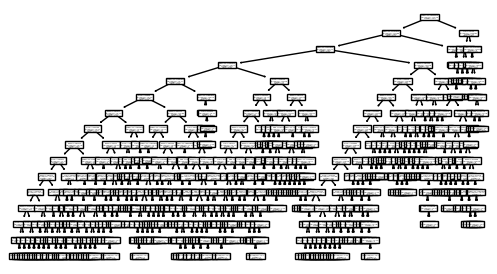

In [101]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [103]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['diff_daily_1']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,diff_daily_1,prediction
Date,,
2016-12-09,0.882095,0.275797
2016-12-12,0.183765,0.275797
...,...,...
2023-03-15,4.649994,4.649994
2023-03-16,10.760010,10.760010


### Evaluate the model: compare predictions with the reality

In [104]:
error = df_predictions.diff_daily_1 - df_predictions.prediction
error.sum().round(2)

0.0

In [105]:
error_squared = error**2
error_squared.sum()

5484.450477496076

In [106]:
error_squared.mean()

3.4799812674467487

In [107]:
error_squared_mean = error_squared.mean()
error_squared_mean

3.4799812674467487

In [108]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

1.8654707897597187

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

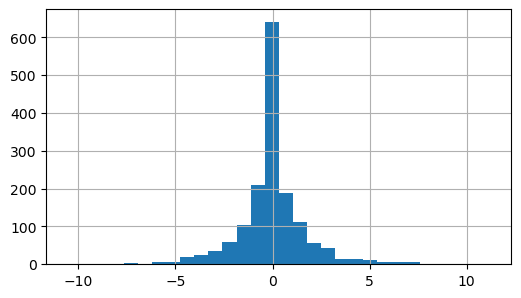

In [109]:
error.hist(bins=30);

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [110]:
import pickle

In [111]:
with open('models/model_dt_microsoft_linkedin_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)